## Load packages

In [1]:
import warnings
import itertools
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('fivethirtyeight')

## Read data 

In [2]:
#path ='file/'
path = './'
# state_ts = pd.read_csv(path+'State_time_series565.csv',parse_dates=['Date'])
state_ts = pd.read_csv(path+'State_time_series565.csv',parse_dates=['Date'])
# y = data.data
print('Number of rows and columns in state ts:',state_ts.shape)

Number of rows and columns in state ts: (13026, 86)


In [3]:
# y = y['MedianSoldPrice_AllHomes'].resample('M').mean()
# # y = y.fillna(y.bfill())
# print(y)

state_ts = state_ts.set_index('Date')
ts = state_ts['MedianSoldPrice_AllHomes']
# ts.head()

# y = y.set_index('Date')
# z = y['MedianSoldPrice_AllHomes']


ts= ts.resample('MS').mean()
# ts = ts.fillna(ts.bfill())
# print(ts)
ts.head()
# ts.plot()

Date
1996-04-01    104658.735294
1996-05-01    105752.311765
1996-06-01    107144.864706
1996-07-01    108547.239706
1996-08-01    109691.269118
Freq: MS, Name: MedianSoldPrice_AllHomes, dtype: float64

In [4]:
ts = ts.fillna(ts.bfill())
ts.head()

Date
1996-04-01    104658.735294
1996-05-01    105752.311765
1996-06-01    107144.864706
1996-07-01    108547.239706
1996-08-01    109691.269118
Freq: MS, Name: MedianSoldPrice_AllHomes, dtype: float64

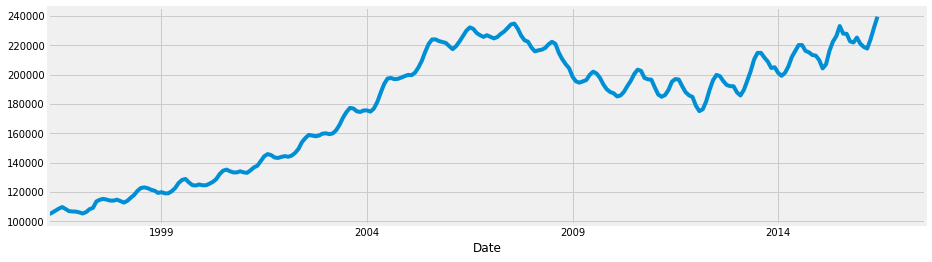

In [5]:
ts.plot(figsize=(14,4))

In [6]:
p = d = q = range(0,2)
pdq=list(itertools.product(p,d,q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [7]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6554.657029583745
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6088.150151990742
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4996.341342042502
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4743.906741929419
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4972.300744909104
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4931.356030259282
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4609.187068339302
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5882.75723202722
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6353.052869199637
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6292.149934186717
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4958.820194692842
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6716.414817812452
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6403.385120784726
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6283.832954109583
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4573.30707720964
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5562.441127264118
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4546.333916473043
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4201.735880708864
ARIMA(0, 1, 

In [8]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
# results.save('model.pkl')
# results.save('arima.h5')

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7170      0.108      6.640      0.000       0.505       0.929
ma.L1         -0.4318      0.129     -3.355      0.001      -0.684      -0.180
ar.S.L12      -0.5020      0.101     -4.961      0.000      -0.700      -0.304
ma.S.L12      -0.0217      0.085     -0.257      0.798      -0.187       0.144
sigma2      2.765e+06    2.7e+05     10.228      0.000    2.24e+06    3.29e+06


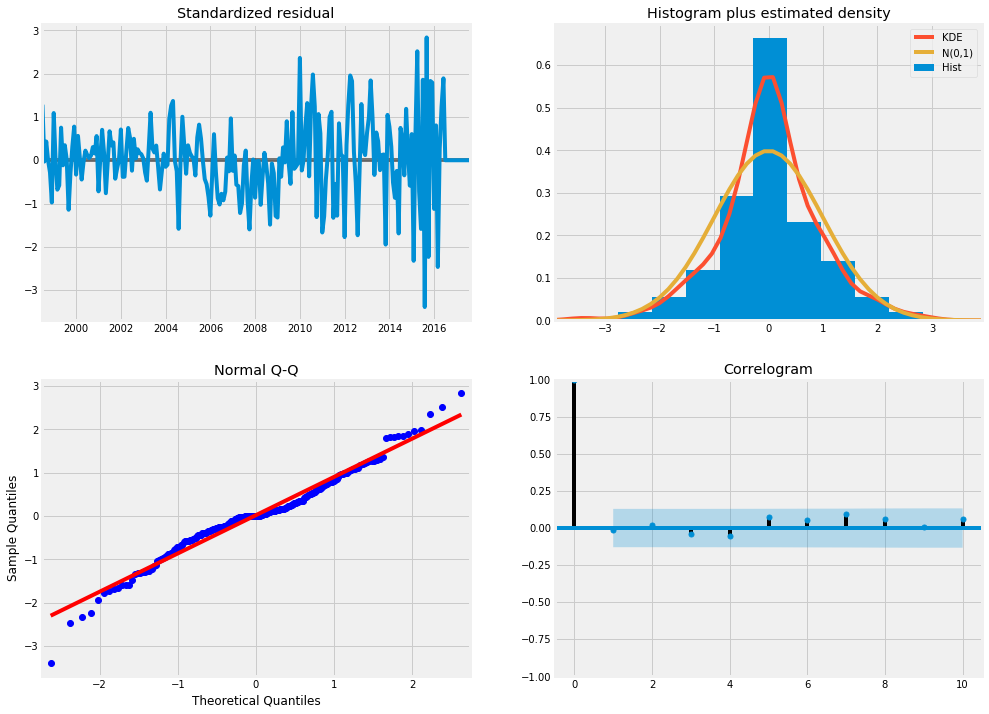

In [9]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [10]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()

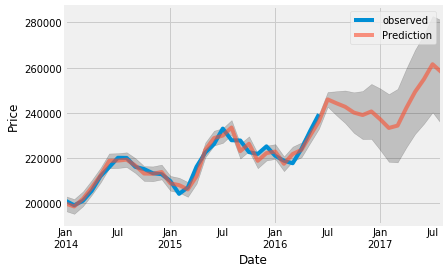

In [11]:
ax = ts['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Prediction', alpha=.6)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [12]:
y_forecasted = pred.predicted_mean
y_truth = ts['2014-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6482988.83


In [13]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

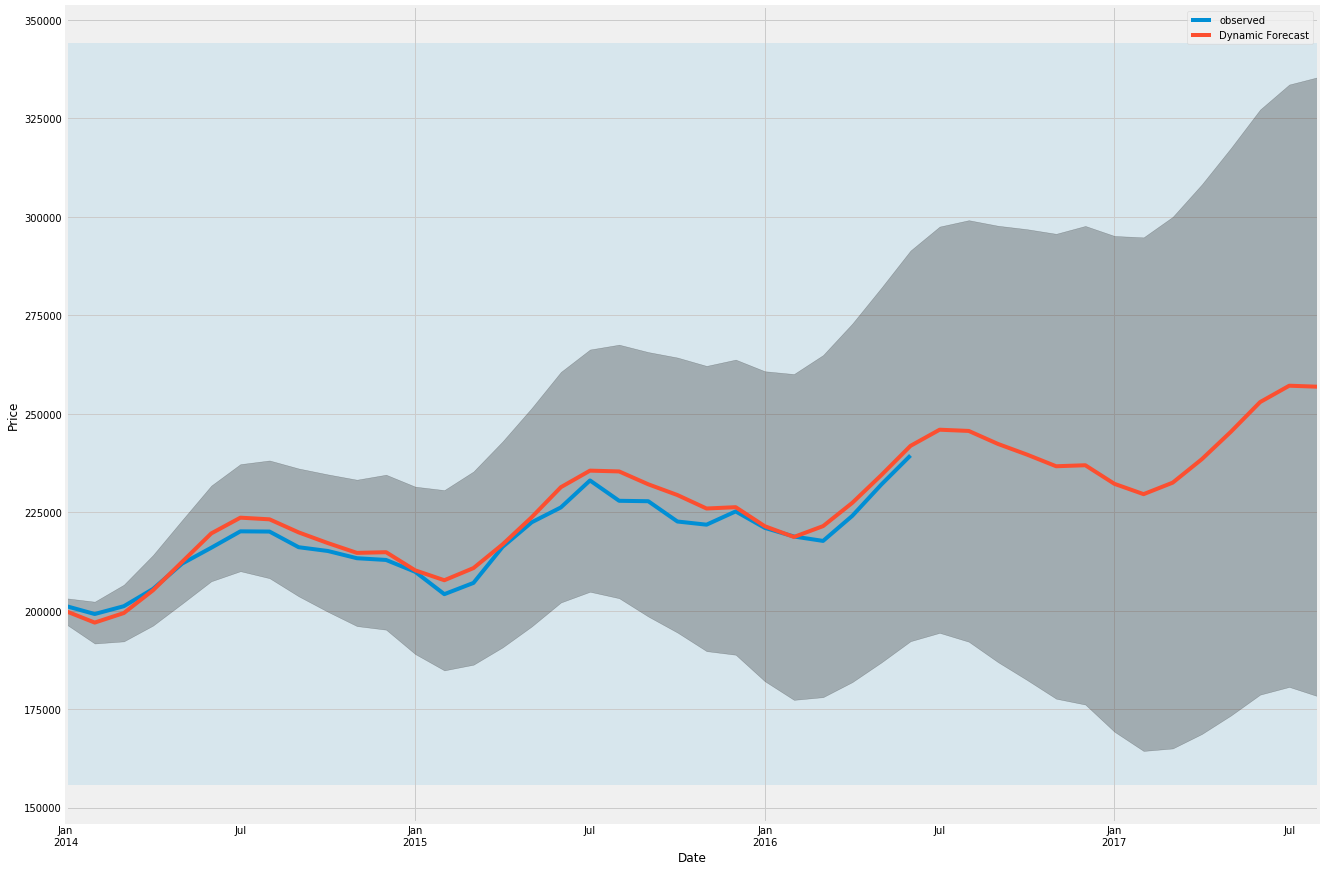

In [14]:
ax = ts['2014':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-01-01'), ts.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [15]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = ts['2014-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10138827.28


In [16]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

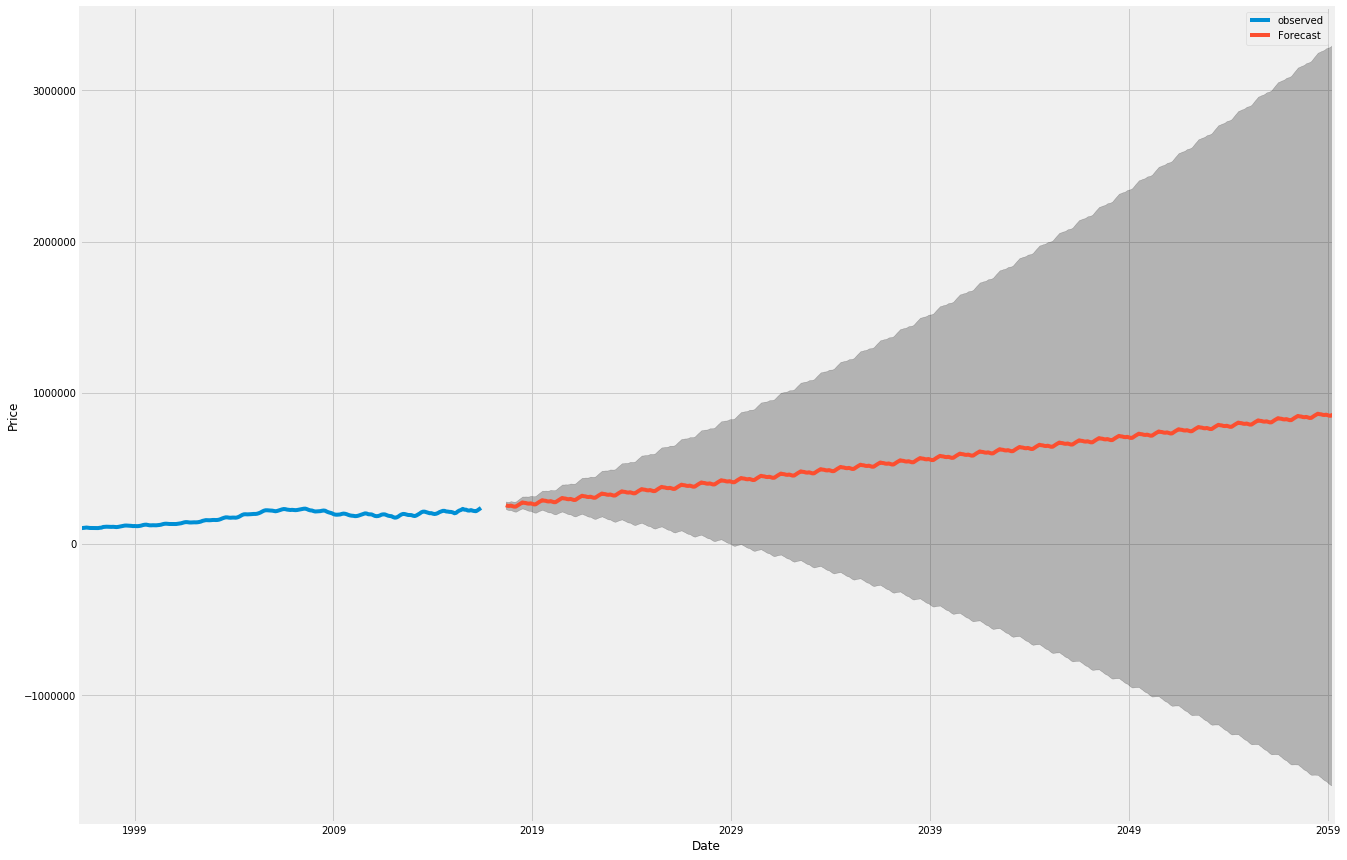

In [17]:
ax = ts.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()